# Simulating the temperatures and fluxes for the plate

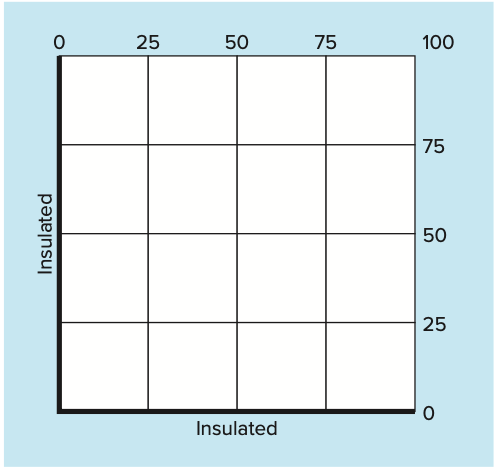

In [1]:
import numpy as np

# Defining the grid size

nx, ny = 10, 10  
dx, dy = 1.0, 1.0  

# Initializing the temperature grid and boundary conditions

T = np.zeros((ny, nx))

# Assuming top edge is at high temperature and bottom at low temperature

T_high = 100.0  
T_low = 0.0  
T[0, :] = T_high
T[-1, :] = T_low

# Thermal conductivity

k = 1.0  

# Performing the simulation until the change in temperature is below a threshold

threshold = 1e-5
max_iter = 5000  
iter_count = 0
delta = threshold + 1.0  

while delta > threshold and iter_count < max_iter:
    T_prev = T.copy()
    
# Updating the temperature at each internal grid point

    for i in range(1, ny - 1):
        for j in range(1, nx - 1):
            T[i, j] = (T_prev[i + 1, j] + T_prev[i - 1, j] + T_prev[i, j + 1] + T_prev[i, j - 1]) / 4.0
            
# Calculating maximum change in temperature

    delta = np.max(np.abs(T - T_prev))
    iter_count += 1

# Calculating  fluxes using central difference

qx = np.zeros_like(T)
qy = np.zeros_like(T)
for i in range(1, ny - 1):
    for j in range(1, nx - 1):
        qx[i, j] = -k * (T[i, j + 1] - T[i, j - 1]) / (2 * dx)
        qy[i, j] = -k * (T[i + 1, j] - T[i - 1, j]) / (2 * dy)

for j in range(nx):
    qx[0, j] = qx[-1, j] = 0  
    qy[0, j] = -k * (T[1, j] - T[0, j]) / dy  
    qy[-1, j] = -k * (T[-1, j] - T[-2, j]) / dy 
    
for i in range(ny):
    qy[i, 0] = qy[i, -1] = 0 
    qx[i, 0] = -k * (T[i, 1] - T[i, 0]) / dx 
    qx[i, -1] = -k * (T[i, -1] - T[i, -2]) / dx 

### Printing the Temperature Distribution 

In [4]:
# Printing the temperature distribution matrix

def print_temperature_distribution(T):
    print("Temperature Distribution (°C):")
    print("Top edge (y = 0):", " ".join(f"{temp:.1f}" for temp in T[0]))
    print("-" * 45)
    for i in range(1, len(T) - 1):
        print(f"y = {i}:  ", " ".join(f"{temp:.1f}" for temp in T[i]))
    print("-" * 45)
    print("Bottom edge (y = 9):", " ".join(f"{temp:.1f}" for temp in T[-1]))

# Printing the heat flux matrix

def print_heat_flux(qx, qy):
    print("\nHeat Flux in x-direction (q_x):")
    for row in qx:
        print("   ", "  ".join(f"{flux:.1f}" for flux in row))
    print("\nHeat Flux in y-direction (q_y):")
    for row in qy:
        print("   ", "  ".join(f"{flux:.1f}" for flux in row))

# Calling the functions to print the output

print_temperature_distribution(T)
print_heat_flux(qx, qy)

Temperature Distribution (°C):
Top edge (y = 0): 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0
---------------------------------------------
y = 1:   0.0 48.6 66.9 74.5 77.3 77.3 74.5 66.9 48.6 0.0
y = 2:   0.0 27.6 44.6 53.6 57.6 57.6 53.6 44.6 27.6 0.0
y = 3:   0.0 17.2 30.0 38.0 41.7 41.7 38.0 30.0 17.2 0.0
y = 4:   0.0 11.3 20.4 26.5 29.6 29.6 26.5 20.4 11.3 0.0
y = 5:   0.0 7.5 13.8 18.2 20.4 20.4 18.2 13.8 7.5 0.0
y = 6:   0.0 4.9 9.0 12.0 13.6 13.6 12.0 9.0 4.9 0.0
y = 7:   0.0 2.9 5.4 7.3 8.3 8.3 7.3 5.4 2.9 0.0
y = 8:   0.0 1.4 2.6 3.4 3.9 3.9 3.4 2.6 1.4 0.0
---------------------------------------------
Bottom edge (y = 9): 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

Heat Flux in x-direction (q_x):
    -0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  -0.0
    -48.6  -33.5  -12.9  -5.2  -1.4  1.4  5.2  12.9  33.5  48.6
    -27.6  -22.3  -13.0  -6.5  -2.0  2.0  6.5  13.0  22.3  27.6
    -17.2  -15.0  -10.4  -5.8  -1.9  1.9  5.8  10.4  15.0  17.2
    -11.3  -10.2  -7.6  

## Explanation 

#### 1. Initialization: To simulate heat conduction, the code creates a 10x10 grid and sets temperatures to zero except for the top and bottom boundaries.

#### 2. Simulation Process: Uses a finite difference method to iteratively update internal grid temperatures using the average temperatures of their four nearest neighbors. The process continues until the highest temperature difference between iterations is less than a threshold that has been set, or until the maximum number of iterations is reached.

### Outputs: - 
   #### Temperature Distribution: Displays temperature distribution from hot top border to cool bottom border, showing a balanced heat transfer across the grid.
   #### Heat Flux: Provides matrices in both x and y directions that show the amount and direction of heat flow, showing how heat transfers mainly from higher to lower temperature regions.